Importujemy pandasy i pyplot

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Pobieramy i dodajemy dane do dataframe

In [4]:
df2celrs = pd.read_csv("http://www.cs.put.poznan.pl/wjaskowski/pub/teaching/kck/labs/python/ipd-choices-9-005/2cel-rs.csv")
df2cel = pd.read_csv("http://www.cs.put.poznan.pl/wjaskowski/pub/teaching/kck/labs/python/ipd-choices-9-005/2cel.csv")
dfcelrs = pd.read_csv("http://www.cs.put.poznan.pl/wjaskowski/pub/teaching/kck/labs/python/ipd-choices-9-005/cel-rs.csv")
dfcel = pd.read_csv("http://www.cs.put.poznan.pl/wjaskowski/pub/teaching/kck/labs/python/ipd-choices-9-005/cel.csv")
dfrsel = pd.read_csv("http://www.cs.put.poznan.pl/wjaskowski/pub/teaching/kck/labs/python/ipd-choices-9-005/rsel.csv")

Przygotowujemy dane

In [126]:
data = [dfrsel, dfcelrs, df2celrs, dfcel, df2cel]
labels = ['1-Evol-RS', '1-Coev-RS', '2-Coev-RS', '1-Coev', '2-Coev']
colors = ['blue', 'green', 'red', 'black', 'fuchsia']
markers = ['o', 'v', 'D', 's', 'd']

Rysujemy wykresy

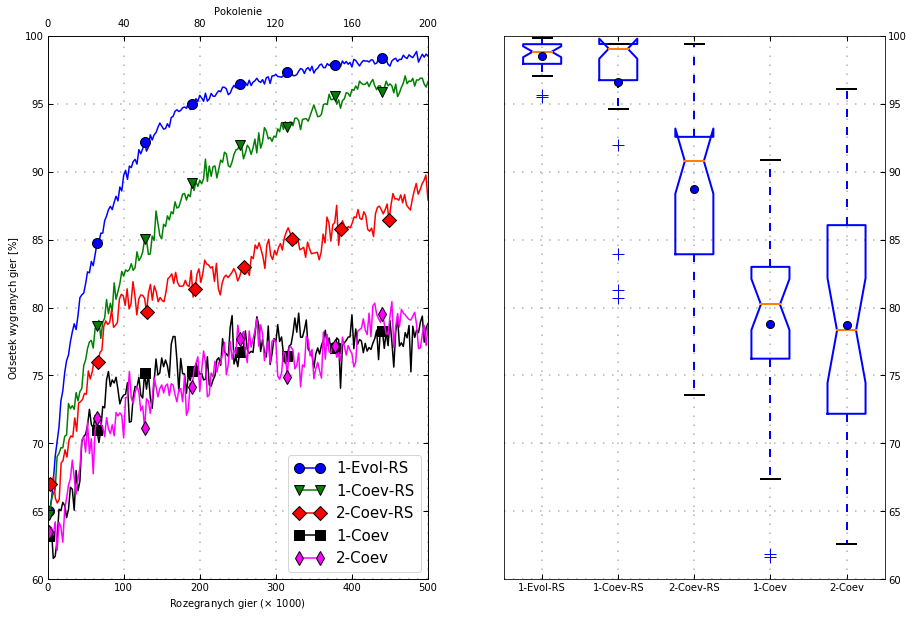

In [137]:
fig = plt.figure(figsize=(15,10)) #Jako że wielkość i tak wychodzi inna, dopasowałem ją do mojego jupytera
ax = fig.add_subplot(121)
axtop = ax.twiny()

for i in range(0,5):
    ax.plot(data[i].effort, data[i].iloc[:, 2:].mean(axis=1), 
             color=colors[i], 
             label=labels[i], 
             marker=markers[i], 
             markevery=25,
             markeredgecolor='black',
             markersize=10)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:int(x/1000)))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:int(y*100)))
ax.set_xlim(0, 500000)
ax.set_ylim(0.6,1.0)
ax.tick_params(direction='in', length=5, width=1, top=True, right=True)
axtop.set_xlabel('Pokolenie')
axtop.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:int(x*200)))
axtop.tick_params(labeltop=True, labelbottom=False, bottom=False, top=False)
ax.set_xlabel(r'Rozegranych gier ($\times$ 1000)')
ax.set_ylabel('Odsetek wygranych gier $[\%]$')
ax.grid(True, linestyle=(0,(1,5)), linewidth=1.5)
ax.legend(loc=4, numpoints=2, prop={'size':15})


bx = fig.add_subplot(122)
plt.boxplot([d.iloc[199, 2:] for d in data] , 
            notch=True, 
            labels=labels,
            showmeans=True,
            boxprops={'color':'blue', 'linewidth': 2},
            flierprops={'marker':'+', 'markeredgecolor':'blue', 'markersize': 12},
            medianprops={'linewidth': 2},
            meanprops={'marker':'o', 'markerfacecolor':'blue', 'markeredgecolor':'black', 'markersize':'8'},
            capprops={'linewidth': 2},
            whiskerprops={'linewidth': 2, 'color': 'blue', 'linestyle': (0,(4,5))})
bx.tick_params(direction='in', length=5, width=1, top=True, right=True, labelright=True, left=False, labelleft=False)
bx.set_ylim(0.6, 1.0)
bx.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:int(y*100)))
plt.grid(True, linestyle=(0,(1,5)), linewidth=1.5)